# Linear regression

Линейная регрессия

$$ y_i = \beta_0 + \beta_1 x_1 + \varepsilon $$


Выборочная линейная регрессия

$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$
<center>из чего следует, что </center>
$$ y_i = \hat{\beta}_0 + \hat{\beta}_1 x_i + \epsilon_i $$  

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import scipy.stats as st
import warnings 

warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Сгенерим игрушечные данные

In [3]:
X, y = make_regression(
    n_samples=20, 
    n_features=1, 
    n_informative=1,
    random_state=42, 
    bias=12.55, noise=15.5
)

In [4]:
y_std = (y - y.min()) / (y.max() - y.min())
y_scaled = y_std * (1000 - 1) + 1

In [5]:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (40 - 10) + 10

<Axes: title={'center': 'Зависимость числа проданных лимонадов от температуры'}, xlabel='Температура воздуха', ylabel='Продано лимонадов'>

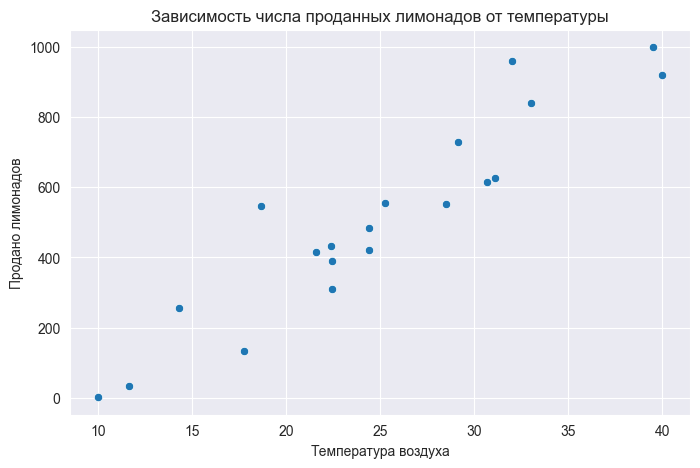

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Зависимость числа проданных лимонадов от температуры')
ax.set_xlabel('Температура воздуха')
ax.set_ylabel('Продано лимонадов')
sns.scatterplot(x=X_scaled[:, 0], y=y_scaled, marker='o', ax=ax)

### Хотим построить прямую (гиперплоскость), которая бы делала как можно меньше ошибок на нашей выборке

In [7]:
def abline(ax, slope, intercept):
    """Plot a line from slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, '--', color='black', label='Regr')

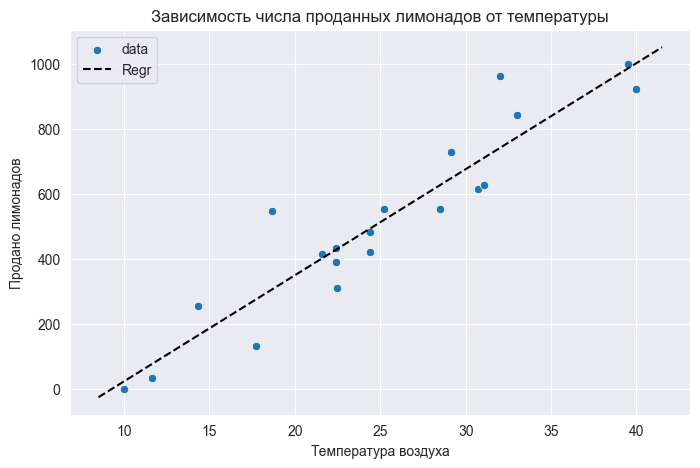

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Зависимость числа проданных лимонадов от температуры')
ax.set_xlabel('Температура воздуха')
ax.set_ylabel('Продано лимонадов')
sns.scatterplot(x=X_scaled[:, 0], y=y_scaled, marker='o', ax=ax, label='data')
abline(ax, 32.6156, -302.8459)
ax.legend()

### Что такое ошибка?

<img src="../pics/ordinary-least-squares-method.jpg" style="width:50%" align = "center"/>

$$\epsilon_i = (y_i - \hat{y}_i) $$

$$ \sum_{i=0}^N{(y_i - \hat{y}_i)} \rightarrow min $$

$$ \sum_{i=0}^N{(y_i - \hat{y}_i)^2} \rightarrow min $$

### SST SSR SSE

![qwe](../pics/e89071_048b367806bc480c9c79275364a56158~mv2.png)

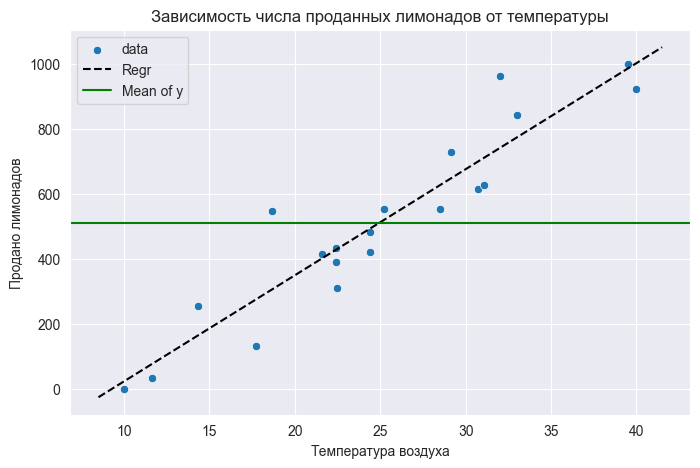

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Зависимость числа проданных лимонадов от температуры')
ax.set_xlabel('Температура воздуха')
ax.set_ylabel('Продано лимонадов')
sns.scatterplot(x=X_scaled[:, 0], y=y_scaled, marker='o', ax=ax, label='data')
abline(ax, 32.6156, -302.8459)
ax.axhline(y=y_scaled.mean(), color='green', label='Mean of y')
ax.legend()

$$ SST = \sum_{i=0}^N{(y_i - \overline{y}_i)^2} $$
$$ SSR = \sum_{i=0}^N{(\hat{y}_i - \overline{y}_i)^2} $$
$$ SSE = \sum_{i=0}^N{(y_i - \hat{y}_i)^2}$$


## Метод наименьших квадратов. Аналитическое решение
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

In [10]:
import statsmodels.api as sm

In [11]:
model = sm.OLS(endog=y_scaled, exog=sm.add_constant(X_scaled), hasconst=True).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     125.4
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.53e-09
Time:                        23:46:40   Log-Likelihood:                -120.35
No. Observations:                  20   AIC:                             244.7
Df Residuals:                      18   BIC:                             246.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -302.8459     76.393     -3.964      0.001    -463.342    -142.349
x1            32.6156      2.913     11.197      0.000      26.496      38.735
==============================================================================
Omnibus:                        5.325   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                3.386
Skew:                           0.982   Prob(JB):                        0.184
Kurtosis:                       3.450   Cond. No.                         85.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Df Residuals
Степени свободы остатков. 
$$\left(n-k-1\right)$$ где n-число наблюдений, k-число признаков

In [13]:
n = 20
k = 1

df_res = n - k - 1

print(f'Calculated Df resid = {df_res}, model df resid = {model.df_resid}')

Calculated Df resid = 18, model df resid = 18.0


### Df. Model
То же, что и число признаков (не считая Intercept)

### R-squared

Коэффициент детерминации

$$ R^2 = \frac{SSR}{SST} = \frac{SSR}{SSE + SSR}$$  

In [14]:
y_hat = model.predict(sm.add_constant(X_scaled))

In [15]:
ssr = np.power(y_hat - y_scaled.mean(), 2).sum()
sse = np.power(y_scaled - y_hat, 2).sum()
sst = ssr + sse
r2 = ssr / sst
print(f'Calculated R^2 = {r2:.3f}\nModel R^2 = {model.rsquared:.3f}')

Calculated R^2 = 0.874
Model R^2 = 0.874


### Adj. R-squared
Смещенный коэфф. детерминации с поправкой на степени свободы
$$ R^2_{adj} = 1 - \left[ \left( 1-R^2 \right) \left( \frac{n-1}{n-k-1} \right) \right]$$

In [16]:
n = 20
k = 1
r2_adj = 1 - ((1-r2) * ((n-1)/(n-k-1)))
print(f'Calculated R^2 = {r2_adj:.3f}\nModel R^2 = {model.rsquared_adj:.3f}')

Calculated R^2 = 0.867
Model R^2 = 0.867


### F-statistic
критерий Фишера значимости модели целиком (т.е. всех ее коэффициентов)
$$ F = \frac{\dfrac{SSR}{k}}{\dfrac{SSE}{df}}$$

In [17]:
fstat = (ssr / k) / (sse / df_res)
pval = 1 - st.f.cdf(fstat, dfn=k, dfd=df_res)
print(f'Calculated F stat = {fstat:.3f}, pval = {pval:.3e}\n'
      f'Model F stat = {model.fvalue:.3f}, pval = {model.f_pvalue:.3e}')


Calculated F stat = 125.367, pval = 1.527e-09
Model F stat = 125.367, pval = 1.527e-09


### Log-Likelihood
<img src="../pics/loglikelihood.png" style="width:50%" align = "center"/>


In [18]:
residuals = model.resid

In [19]:
loglikelihood_func = (
    np.log(
        1 / (residuals.std() * np.sqrt(2 * np.pi))
    ) - (
        np.power(y_scaled - y_hat, 2) / (2 * residuals.var())
    )
).sum()

In [20]:
print(f'Calculated LLF = {loglikelihood_func:.3f}\nModel LLF = {model.llf:.3f}')

Calculated LLF = -120.349
Model LLF = -120.349


### AIC - инфомационный критерий Акаике 
$$ 2k−2l $$
Где k - количество параметров (включая Intercept),  
l - значение функции правдоподобия

In [21]:
aic = 2 * (k + 1) - 2 * loglikelihood_func

In [22]:
print(f'Calculated AIC = {aic:.3f}\nModel AIC = {model.aic:.3f}')

Calculated AIC = 244.697
Model AIC = 244.697


### BIC - Байесовский информационный критерий
$$ {\displaystyle k*\ln( \text{n})-2*\text{l}} $$
Где k - количество параметров (включая Intercept),  
n - количество наблюдений,  
l - значение функции правдоподобия

In [23]:
bic = (k + 1) * np.log(n) - 2 * loglikelihood_func

In [24]:
print(f'Calculated BIC = {bic:.3f}\nModel BIC = {model.bic:.3f}')

Calculated BIC = 246.689
Model BIC = 246.689


### Coef
Коэффициенты модели

In [25]:
x_tmp = sm.add_constant(X_scaled)

In [26]:
coeffs = np.linalg.inv(x_tmp.T @ x_tmp) @ x_tmp.T @ y_scaled

In [27]:
print(f'Calculated coefficients {coeffs}')
print(f'Model coefficients {model.params}')

Calculated coefficients [-302.8459246    32.61556149]
Model coefficients [-302.8459246    32.61556149]


### std err
Стандартная ошибка коэффициентов. Вычисляется из матрицы
$$ C = \mathrm{cov}(\beta)=\sigma^2 \left( X^TX \right)^{-1}$$

In [28]:
cov_matr = np.linalg.inv(x_tmp.T @ x_tmp) * residuals.var(ddof=(k+1))

cov_matr

array([[5835.95029642, -211.82092044],
       [-211.82092044,    8.48527093]])

In [29]:
stderrs = np.sqrt(np.diag(cov_matr))

In [30]:
print(f'Calculated SE {stderrs}')
print(f'Model SE {model.bse}')

Calculated SE [76.39339171  2.91294884]
Model SE [76.39339171  2.91294884]


### t
Критерий стьюдента значимости коэффициентов
$$ t_i = \frac{\beta_i}{SE_i} $$

Где $SE_i$ -- ошибка на данном коэффициенте

In [31]:
tvals = coeffs / stderrs

In [32]:
print(f'Calculated t values {tvals}')
print(f'Model t values {model.tvalues}')

Calculated t values [-3.96429479 11.19675054]
Model t values [-3.96429479 11.19675054]


### P>|t| 
p-value критерия Стьюдента

In [33]:
tpvals = (1 - st.t.cdf(np.abs(tvals), df=df_res)) * 2

In [34]:
print(f'Calculated t test p-values  {tpvals}')
print(f'Model t test p-values {model.pvalues}')

Calculated t test p-values  [9.09351741e-04 1.52666013e-09]
Model t test p-values [9.09351741e-04 1.52666013e-09]


### Omnibus
Тест на то, больше ли объясненная вариация, чем не объясненная. Использует ассиметрию и эксцесс

![skew](../pics/skewness.png)  

![kurt](../pics/kurtosis.png)  

![omn](../pics/omnibus.png)


### Durbin-Watson

Критерий Дарбина-Уотсона на наличие автокоррелции. 2 - если автокорреляции нет, --> 0 если положительная, --> 4 если отрицательная

<img src="../pics/dw.png" style="width:50%" align = "center"/>

### Jarque-Bera (JB)
тест Харке-Бера, проверяющий ошибки на нормальность

<img src="../pics/jb.png" style="width:50%" align = "center"/>

### Что еще? Q-Q plot!

Text(0.5, 1.0, 'Q-Q plot for residuals')

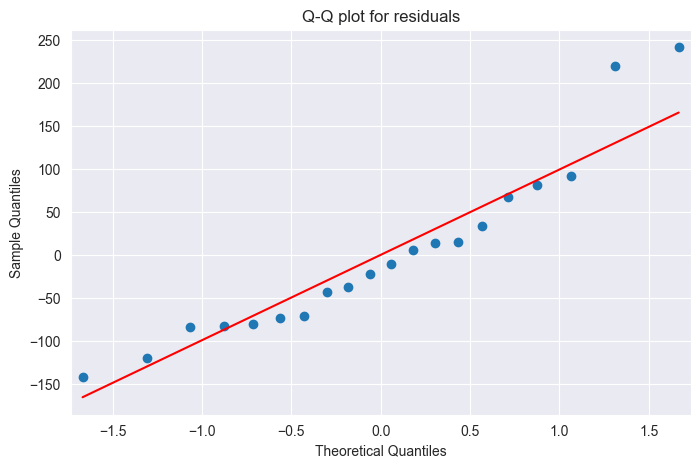

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
fig = sm.qqplot(model.resid, line='s', ax=ax)
ax.set_title('Q-Q plot for residuals')

Text(0.5, 1.0, 'Residuals plot')

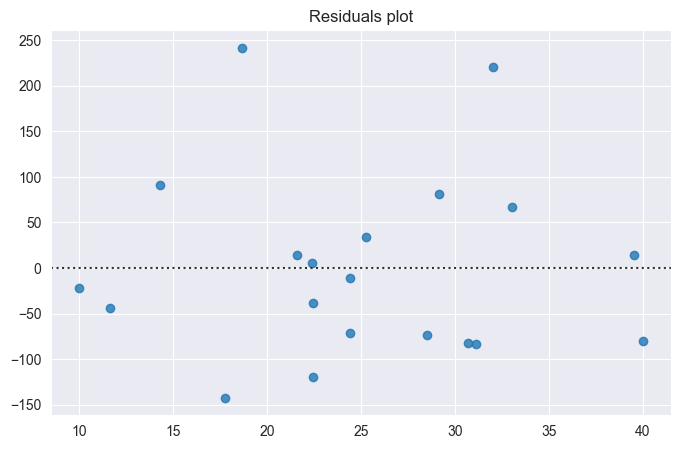

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
fig = sns.residplot(y=model.resid, x=X_scaled, ax=ax)
ax.set_title('Residuals plot')

## Условия применимости метода наименьших квадратов. Теорема Гаусса-Маркова

Если данные обладают следующими свойствами:
1. Модель данных правильно специфицирована
2. Все $X_{i}$ детерминированы и не все равны между собой
3. Ошибки не носят систематического характера, то есть $\mathbb{E}(\varepsilon_i) = 0\ \forall i$
4. Дисперсия ошибок одинакова и равна некоторой $\sigma ^{2}$  (**Гомоскедастичность**)
5. Ошибки некоррелированы между собой, то есть $\mathop{\mathrm{Cov}}(\varepsilon_i,\varepsilon_j)=0\ \forall i,j$ (**отсутствие автокорреляции**)  


— то в этих условиях оценки метода наименьших квадратов оптимальны в классе линейных несмещённых оценок.  

Дополнительно:
1. Ошибки некоррелированы с регрессорами, то есть $\mathop{\mathrm{Cov}}(\varepsilon_i,\beta_j)=0\ \forall i,j$
2. Ошибки из себя представляют слабый белый (гауссовский) шум.
3. Регрессоры некоррелированы между собой, то есть $\mathop{\mathrm{Cov}}(\beta_i,\beta_j)=0\ \forall i,j$ (**отсутствие мультиколлинеарности**)
  


## Метод наименьших квадратов. Численное решение

### Градиентный спуск
$$ \hat{\beta}_{t+1} = \hat{\beta}_{t}-\gamma\nabla L \left(\hat{\beta}_{t} \right)$$

In [71]:
def mse(y_true, y_hat, derivative=False):
    """
    Mean squared error regression loss
    :param y_true: vector of truth (correct) target values
    :param y_hat: vector of estimated target values
    :return: loss
    """
    return (y_true - y_hat).dot((y_true - y_hat)) / len(y_true)


class LinRegGD:
    def __init__(self, lambda_coef=0.1):
        """
        :param lambda_coef: constant coef for gradient descent step
        """
        self.learning_rate = lambda_coef
        self.__fitted = False
        self.cost_history = []

    def fit(self, X_train, y_train, iterations=1000, eps=1e-6):
        """
        Fit model using gradient descent method
        :param X_train: training data
        :param y_train: target values for training data
        :return: None
        """
        self.__fitted = True
        assert X_train.shape[0] == y_train.shape[0], "Shapes don't match"
        ones = np.ones((X_train.shape[0], 1))
        X_train = np.hstack([ones, X_train])
        n, m = X_train.shape
        # cost_history = np.zeros(iterations)
        tmp = np.inf
        self.__w = np.random.randn(m) / np.sqrt(m)
        for it in range(iterations):
            prediction = self.predict(X_train)
            self.__w -= (2/n) * self.learning_rate*(X_train.T.dot(
                (prediction - y_train)))
            cost = mse(y_train, prediction)
            if np.abs(tmp - cost) < eps:
                break
            tmp = cost
            self.cost_history.append(tmp)
        print(f'Took {it} iterations')
        self.coef_ = self.__w[1:]
        self.intercept_ = self.__w[0]
        return self

    def predict(self, X_test):
        """
        Predict using model.
        :param X_test: test data for predict in
        :return: y_test: predicted values
        """
        assert self.__fitted, 'Model is not fitted'
        if all(X_test[:, 0] == 1):
            return X_test.dot(self.__w)
        else:
            ones = np.ones((X_test.shape[0], 1))
            X_test = np.hstack([ones, X_test])
            return X_test.dot(self.__w)

    def get_weights(self):
        """
        Get weights from fitted linear model
        :return: weights array
        """
        assert self.__fitted, 'Model is not fitted'
        return self.__w

    def __repr__(self):
        name = self.__class__.__name__
        return f'{name}(learning_rate={self.learning_rate}, ' +\
               f'weights = {self.get_weights()}'

In [72]:
X_scaled2 = (X_scaled - X_scaled.mean()) / X_scaled.std()
y_scaled2 = (y_scaled - y_scaled.mean()) / y_scaled.std()

In [73]:
regr = LinRegGD(lambda_coef=0.001)

In [74]:
regr.fit(X_scaled2, y_scaled2, iterations=100000)

Took 2142 iterations


LinRegGD(learning_rate=0.001, weights = [-0.01145368  0.9243383 ]

<Axes: title={'center': 'Cost function value'}, xlabel='Itertion number', ylabel='Cost function'>

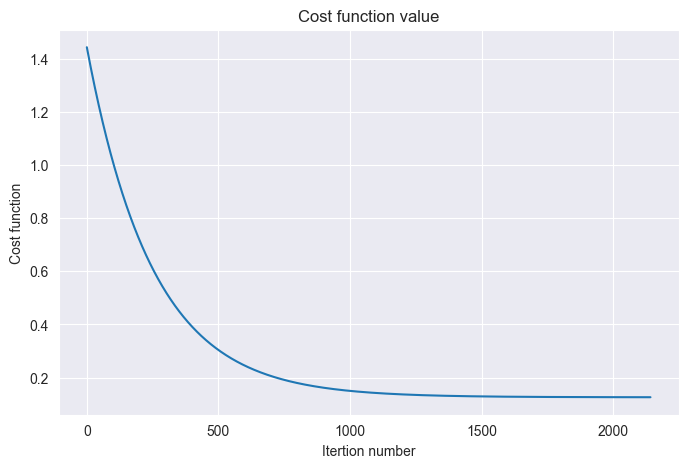

In [75]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Cost function value')
ax.set_xlabel('Itertion number')
ax.set_ylabel('Cost function')
sns.lineplot(x=range(len(regr.cost_history)), y=regr.cost_history, ax=ax)

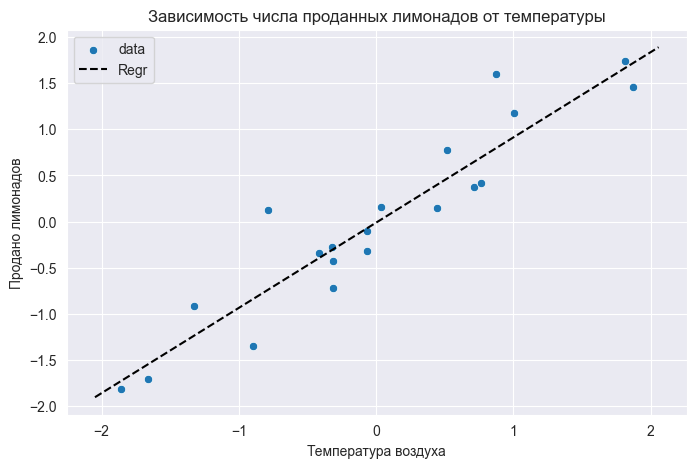

In [76]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Зависимость числа проданных лимонадов от температуры')
ax.set_xlabel('Температура воздуха')
ax.set_ylabel('Продано лимонадов')
sns.scatterplot(x=X_scaled2[:, 0], y=y_scaled2, marker='o', ax=ax, label='data')
abline(ax, regr.coef_[0], regr.intercept_)
ax.legend()

### А как???

In [77]:
# Хотим узнать сколько бы лимонадов продали при температурах
data = np.array([
    [45],
    [43], 
    [42]
])

In [79]:
# Скейл на основе обучающих данных
data_scaled = (data - X_scaled.mean()) / X_scaled.std()

In [80]:
# YOLO!
result = regr.predict(data_scaled)

In [81]:
# What???
result  

array([2.29276729, 2.06276649, 1.94776609])

In [82]:
# Рескейл обратно
result * y_scaled.std() + y_scaled.mean()

array([1154.10903552, 1089.62996995, 1057.39043716])

## Боремся с мультиколлинеарностью

Мультикоррлинеарность признаков приводит к неустойчивости оценок

In [83]:
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]), 
                 columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                          'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

y = pd.Series(raw_df.values[1::2, 2], name='MEDV')

In [84]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [85]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Text(0.5, 1.0, 'Boston housing correlation matrix')

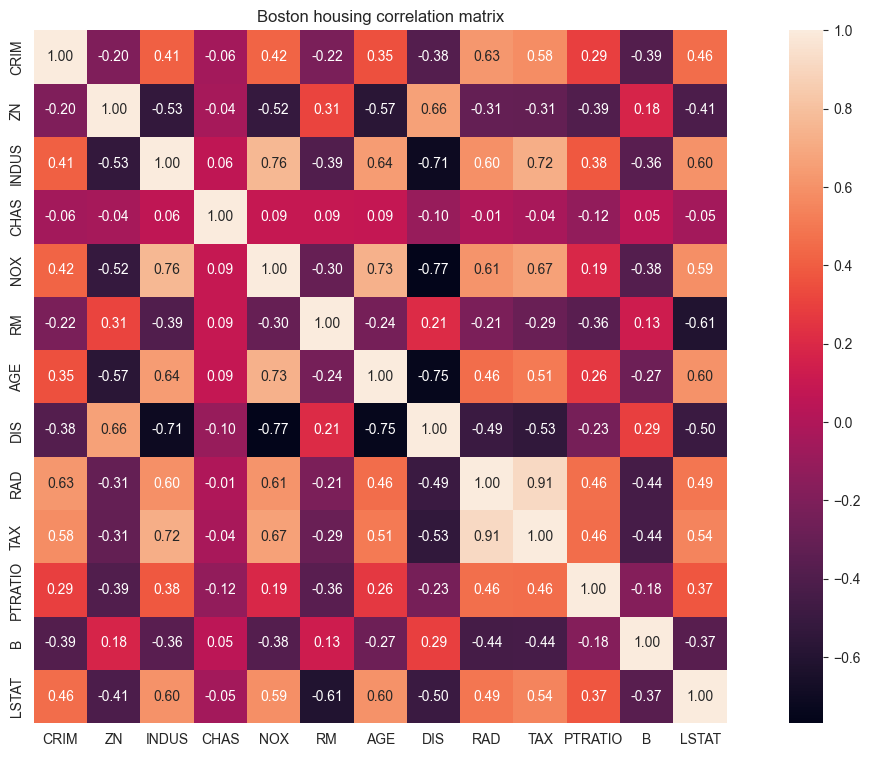

In [86]:
fix, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(X.corr(), annot=True, fmt='.2f', square=True, ax=ax)
ax.set_title('Boston housing correlation matrix')

### Ридж-регрессия a.k.a. регуляризация по Тихонову a.k.a. L2-регуляризация

$$ \sum_{i=0}^N{(y_i - \hat{y}_i)^2 + \alpha\hat{\beta}_i^2} \rightarrow min $$

МНК-оценки в таком случае будут выглядеть следующим образом
$$\hat{\beta} = (X^TX+\alpha I_k)^{-1}X^Ty$$

In [87]:
model = sm.OLS(endog=y, exog=sm.add_constant(X), hasconst=True)
result = model.fit_regularized(L1_wt=0, alpha=0.5)

In [88]:
from statsmodels.tools.tools import pinv_extended

pinv_wexog,_ = pinv_extended(model.wexog)
normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))


final = sm.regression.linear_model.OLSResults(model, 
                                              result.params, 
                                              normalized_cov_params)

In [89]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     73.41
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          3.42e-106
Time:                        10:41:25   Log-Likelihood:                -1567.4
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     492   BIC:                             3222.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3688      5.845      0.063      0.950     -11.115      11.853
CRIM          -0.0902      0.038     -2.397      0.017      -0.164      -0.016
ZN             0.0780      0.016      4.960      0.000       0.047       0.109
INDUS         -0.0110      0.070     -0.156      0.876      -0.149       0.127
CHAS           0.4085      0.987      0.414      0.679      -1.530       2.347
NOX            0.1349      4.375      0.031      0.975      -8.460       8.730
RM             3.3929      0.479      7.089      0.000       2.452       4.333
AGE            0.0463      0.015      3.058      0.002       0.017       0.076
DIS           -0.5095      0.228     -2.230      0.026      -0.958      -0.061
RAD            0.1500      0.076      1.974      0.049       0.001       0.299
TAX           -0.0080      0.004     -1.852      0.065      -0.016       0.000
PTRATIO        0.0521      0.150      0.348      0.728      -0.242       0.346
B              0.0210      0.003      6.819      0.000       0.015       0.027
LSTAT         -0.6120      0.058    -10.536      0.000      -0.726      -0.498
==============================================================================
Omnibus:                      136.710   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.426
Skew:                           1.312   Prob(JB):                     3.00e-82
Kurtosis:                       6.305   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Или численно через sklearn 

In [90]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
scaler = StandardScaler()

In [95]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
regr = Ridge(alpha=0.5)

In [97]:
regr.fit(X_train_scaled, y_train)

Ridge(alpha=0.5)

In [98]:
mean_squared_error(y_test, regr.predict(X_test_scaled))

21.533063506926162

In [99]:
cv = KFold(n_splits=5, shuffle=True)

cross_val_score(regr, X_train_scaled, y_train, cv=cv, scoring=make_scorer(mean_squared_error))

array([28.21646061, 28.26560229, 25.17189133, 23.54303053, 20.65831553])

In [102]:
params = {
    'alpha': np.linspace(0.25, 0.75, 10),
}

regr = Ridge()

gs = GridSearchCV(regr, params, scoring='neg_mean_squared_error', cv=cv)

In [103]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([0.25      , 0.30555556, 0.36111111, 0.41666667, 0.47222222,
       0.52777778, 0.58333333, 0.63888889, 0.69444444, 0.75      ])},
             scoring='neg_mean_squared_error')

In [104]:
gs.best_params_

{'alpha': 0.75}

In [105]:
gs.best_score_

-25.316387450507968

In [108]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('regr', Ridge(alpha=0.75)),
])

In [109]:
model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('regr', Ridge(alpha=0.75))])

In [110]:
mean_squared_error(y_test, model.predict(X_test))

21.540863677986206